In [ ]:
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
import numpy as np
from sklearn.metrics import confusion_matrix
from keras.datasets import mnist

11490434/11490434 [==============================] - 0s 0us/step


Text(0.5, 1.0, '0')

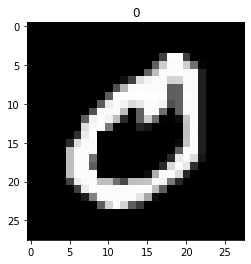

In [ ]:
#Obtenção dos dados e divisão automática entre treinamento e teste
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#visulaização de imagens específicas
plt.imshow(x_train[21], cmap = 'gray')
plt.title(y_train[21])

In [ ]:
#Mudança de dimensão, originalmente está em 28x28 e precisamos 728
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_test[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

In [ ]:
#Transformação dos dados para float para podermos normalizar os dados
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [ ]:
#Normalização (255 é o valor máximo de um pixel)
x_train /= 255
x_test /= 255

In [ ]:
#Transformação para o formato dummy (temos 10 classes)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [ ]:
#Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
#Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar overfitting
modelo = Sequential()
modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))
#vamada de saída, softmax probabilidade
modelo.add(Dense(units = 10, activation = 'softmax'))

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 10)                6

In [ ]:
#Configuração dos parâmetros da rede neural e treinamento (utilizando base de dados de validação)
#Na variável historioco temos o histórico das execuções(erro e accuracy)
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])
historico = modelo.fit(x_train, y_train, epochs = 20,
                       validation_data = (x_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4474 - accuracy: 0.8633 - val_loss: 0.1722 - val_accuracy: 0.9478
Epoch 2/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2355 - accuracy: 0.9316 - val_loss: 0.1321 - val_accuracy: 0.9598
Epoch 3/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1958 - accuracy: 0.9429 - val_loss: 0.1238 - val_accuracy: 0.9638
Epoch 4/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1715 - accuracy: 0.9497 - val_loss: 0.1116 - val_accuracy: 0.9665
Epoch 5/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1552 - accuracy: 0.9546 - val_loss: 0.1126 - val_accuracy: 0.9676
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1448 - accuracy: 0.9574 - val_loss: 0.1053 - val_accuracy: 0.9701
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1359 - accuracy: 0.9598 - val_loss: 0.1079 - val_accuracy

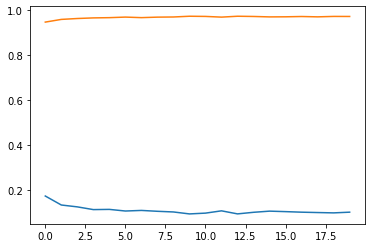

In [ ]:
#Gráfico para visualizar os erros e accuracy
historico.history.keys()
#evolução do erro, azul
plt.plot(historico.history['val_loss'])
plt.plot(historico.history['val_accuracy'])

In [ ]:
#obtenção das previsões
previsoes = modelo.predict(x_test)
previsoes

313/313 [==============================] - 1s 2ms/step


array([[4.94157146e-12, 1.11969598e-07, 1.77436505e-07, ...,
        9.99998868e-01, 3.65827346e-09, 4.89258127e-07],
       [1.05794496e-12, 5.89230069e-07, 9.99993265e-01, ...,
        5.45491297e-08, 3.77718523e-10, 2.42237256e-15],
       [2.42590130e-16, 9.99999940e-01, 1.15341105e-10, ...,
        5.97073546e-09, 1.01509858e-08, 1.09596872e-11],
       ...,
       [1.47786226e-14, 2.08752477e-11, 3.79865361e-10, ...,
        5.66298208e-09, 1.66390079e-11, 6.48152110e-08],
       [8.82688644e-11, 4.91932320e-12, 8.48471141e-13, ...,
        5.90416442e-13, 3.13065556e-07, 3.38705952e-08],
       [2.38901499e-09, 1.45472652e-20, 1.19009645e-14, ...,
        1.13611073e-19, 2.25159477e-13, 2.30578758e-15]], dtype=float32)

In [ ]:
#valor máximo (com a probabilidade maior por serem 10 saídas) e geração de matriz de confusão
y_test_matriz = [np.argmax(t) for t in y_test]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]
confusao = confusion_matrix(y_test_matriz, y_previsoes_matriz)
confusao

array([[ 968,    0,    2,    1,    0,    1,    4,    1,    1,    2],
       [   0, 1124,    3,    2,    0,    0,    1,    1,    4,    0],
       [   2,    1, 1009,    5,    2,    1,    1,    6,    5,    0],
       [   1,    0,    3,  991,    0,    3,    0,    4,    5,    3],
       [   2,    1,    4,    0,  956,    0,    5,    4,    1,    9],
       [   4,    1,    0,   16,    0,  848,    7,    3,    9,    4],
       [   6,    3,    0,    1,    4,    7,  933,    1,    3,    0],
       [   2,    3,   11,    2,    1,    0,    0, 1000,    4,    5],
       [   3,    3,    7,    9,    4,    5,    0,    5,  933,    5],
       [   3,    4,    0,    7,   13,    2,    1,    7,    5,  967]])

In [ ]:
#Previsão para um novo registro, convertendo o array para o formato de matriz
y_train[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
#passo a mesma posição para o modelo prever
novo = x_train[20]
#de matriz para vetor
novo = np.expand_dims(novo, axis = 0)
#previsao
pred = modelo.predict(novo)
#maior valor
pred = [np.argmax(pred) for t in pred]
pred

1/1 [==============================] - 0s 30ms/step


[4]